# 1.Business Understanding

Airbnb operates an online marketplce for lodging, primarily homestays for vacation rentals, and tourism activities. This blog is an effort to interpret the Boston Airbnb data from kaggle and answer several questions below:

- Build a model to predict property price
- what features that influence the property price? 
- What time of year has the highest rental price?




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression



# 2.Data Understanding

## 2.1.Data Gathering

In [2]:
listing_df = pd.read_csv('listings.csv')
calendar_df = pd.read_csv('calendar.csv')
review_df = pd.read_csv('reviews.csv')

In [3]:
for data in [listing_df, calendar_df, review_df]:
    print(data.shape)

(3585, 95)
(1308890, 4)
(68275, 6)


In [4]:
for data in [listing_df, calendar_df, review_df]:
    display(data.head())

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


- listing data

In [5]:
#check the datatype for each column and non-null values 
listing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [6]:
#remove the column which has all nan values since it cannot be filled with any reference value
listing_df.dropna(axis=1, how='all', inplace=True)
listing_df.shape

(3585, 91)

- calendar data


In [7]:
#check the datatype for each column and non-null values
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


- review data

In [8]:
#check datatype
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     68275 non-null  int64 
 1   id             68275 non-null  int64 
 2   date           68275 non-null  object
 3   reviewer_id    68275 non-null  int64 
 4   reviewer_name  68275 non-null  object
 5   comments       68222 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


## 2.2.Data Cleaning 
### Cleaning for listing dataset

In [9]:
#drop na rows in bathrooms, bedrooms, beds 
listing_df.dropna(axis = 0, subset = ['bathrooms', 'bedrooms', 'beds'], inplace = True)

#creating new df with bathrooms, bedrooms, beds
df_rooms = listing_df[['bathrooms', 'bedrooms', 'beds']]

#converting the data type from string to integer
for room in df_rooms:
    df_rooms[room].astype(int)
    

    
listing_df[['bathrooms', 'bedrooms', 'beds']] = df_rooms[['bathrooms', 'bedrooms', 'beds']]

In [10]:
#replace $ from the price values and convert str into float data type
for fee in ['cleaning_fee', 'security_deposit', 'price']:
    listing_df[fee] = listing_df[fee].map(lambda x: x.replace("$", '').replace(",",''), na_action = 'ignore')
    listing_df[fee] = listing_df[fee].astype(float)
    listing_df[fee].fillna(listing_df[fee].median(), inplace = True)

In [11]:
#fill na for review columns, since the review data distribution show that the data
# is highly skewed to the left, choose mean to fillna 
for feature in['review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness',
              'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
              'review_scores_value', 'reviews_per_month']:
    listing_df[feature].fillna(listing_df[feature].mean(),inplace = True)

In [12]:
#for categorical values in the df

#create new df only has numerical columns
df_int = listing_df.select_dtypes(include = ['int64', 'float64'])

#add categorical columns to df_int
df_int[['room_type', 'neighbourhood_cleansed', 'cancellation_policy',
       'property_type']] = listing_df[['room_type', 'neighbourhood_cleansed', 'cancellation_policy','property_type']]
#drop the columns that have large number of null
df_int.drop(labels = ['square_feet'], axis = 1, inplace = True)
df_int.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3557 entries, 0 to 3584
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3557 non-null   int64  
 1   scrape_id                       3557 non-null   int64  
 2   host_id                         3557 non-null   int64  
 3   host_listings_count             3557 non-null   int64  
 4   host_total_listings_count       3557 non-null   int64  
 5   latitude                        3557 non-null   float64
 6   longitude                       3557 non-null   float64
 7   accommodates                    3557 non-null   int64  
 8   bathrooms                       3557 non-null   float64
 9   bedrooms                        3557 non-null   float64
 10  beds                            3557 non-null   float64
 11  price                           3557 non-null   float64
 12  security_deposit                35

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [13]:
#create dummy variables 
cleanup_nums = {"room_type": {"Entire home/apt": 1, "Private room": 2, "Shared room": 3},
                "cancellation_policy": {"moderate": 1, "flexible": 2, "strict": 3, "super_strict_30": 4}}      
df_int_copy = df_int
df_int_copy = df_int_copy.replace(cleanup_nums)

df_int_dummies = pd.get_dummies(df_int_copy)

### Cleaning for calendar dataset

In [14]:
#extract month from dates columns
calendar_df['month'] = calendar_df.date.apply(lambda x: x.split('-')[1])
calendar_df['month'] = calendar_df['month'].replace({
    '01': 'Jan',
    '02': 'Feb',
    '03': 'Mar',
    '04': 'Apr',
    '05': 'May',
    '06': 'Jun',
    '07': 'Jul',
    '08': 'Aug',
    '09': 'Sep',
    '10': 'Oct',
    '11': 'Nov',
    '12': 'Dec'
})

In [15]:
#remove special character from price column
#convert to float
calendar_df.dropna(axis = 0, subset = ["price"], inplace = True)
calendar_df['price'] = calendar_df['price'].map(lambda x: x.replace("$", '').replace(",", ''), na_action = 'ignore').astype(float)
calendar_df.head()

,listing_id,date,available,price,month
365,3075044,2017-08-22,t,65.0,Aug
366,3075044,2017-08-21,t,65.0,Aug
367,3075044,2017-08-20,t,65.0,Aug
368,3075044,2017-08-19,t,75.0,Aug
369,3075044,2017-08-18,t,75.0,Aug


# 3.Modeling and Evaluation


In [16]:
X = df_int_dummies.drop(labels = ["price"], axis = 1)
y = df_int_dummies['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

#create a function to fit the model and evaluate
def model_evaluate(model, X_train, y_train, X_test, y_test):
    '''
    take training to fit the model and test on testing data set
    '''
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, pred)
    print("MAE from {0}:{1}".format(model, mae))
    fig = plt.figure(figsize = (12, 8), dpi = 80)
    ax1 = fig.add_subplot(111)
    lines = plt.plot(y_test - pred, marker= 'o', linestyle = '')
    ax1.set_xlabel('True Value_{}'.format(model))
    ax1.set_ylabel('Predictions_{}'.format(model))

MAE from RandomForestRegressor(random_state=0):47.36011235955057


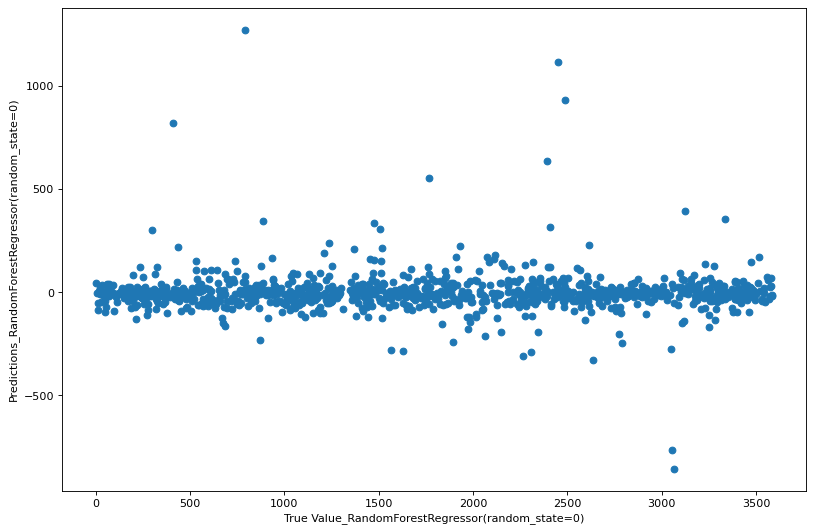

In [17]:
#random forest regressor
model_rf = RandomForestRegressor(n_estimators = 100, random_state = 0)
model_evaluate(model_rf, X_train, y_train, X_test, y_test)

In [23]:
model_rf.predict

<bound method ForestRegressor.predict of RandomForestRegressor(random_state=0)>

MAE from LinearRegression():171.42041198501872


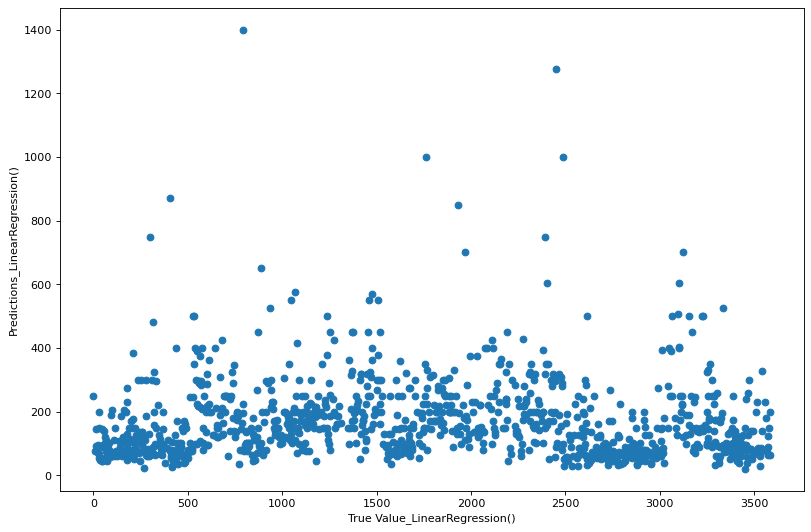

In [18]:
#linear regression
model_lr = LinearRegression()
model_evaluate(model_lr, X_train, y_train, X_test, y_test)

Based on the results from above two models, Random Forest Regreesor has a MAE of 47.2 comparing to Linear Regression MAe value 32596, which means Random Forest model is performing better.

# 4. Visualization


- For the first question about the features that influence the property price. 

In [19]:
#count the total number of entries for each type in room_type feature
df_int.groupby(['room_type']).count()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,neighbourhood_cleansed,cancellation_policy,property_type
room_type,,,,,,,,,,,,,,,,,,,,,
Entire home/apt,2113,2113,2113,2113,2113,2113,2113,2113,2113,2113,...,2113,2113,2113,2113,2113,2113,2113,2113,2113,2111
Private room,1365,1365,1365,1365,1365,1365,1365,1365,1365,1365,...,1365,1365,1365,1365,1365,1365,1365,1365,1365,1364
Shared room,79,79,79,79,79,79,79,79,79,79,...,79,79,79,79,79,79,79,79,79,79


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


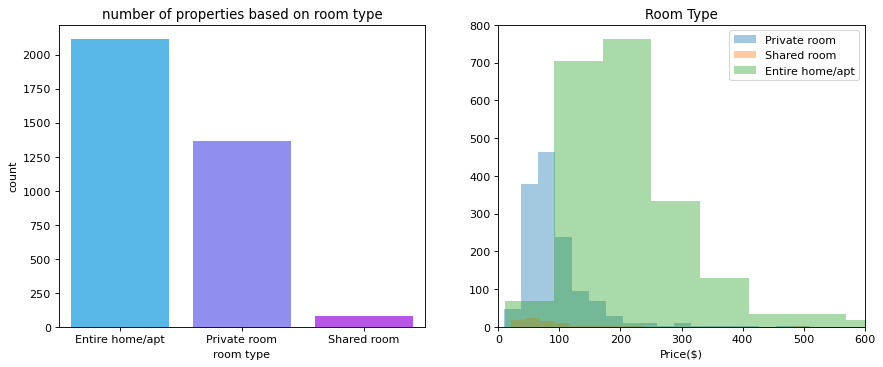

In [20]:
#visualize the room_type and their mean price for each type
fig, axs = plt.subplots(1, 2, figsize = (13, 5), dpi = 80)
sns.countplot(x = 'room_type', data = df_int, palette = 'cool', ax = axs[0]).set_title("number of properties based on room type")
axs[0].set_xlabel('room type')

#visualize the distribution of pricing among each room type
sns.distplot(df_int[df_int.room_type == 'Private room']['price'], kde = False, ax = axs[1], label = 'Private room')
sns.distplot(df_int[df_int.room_type == 'Shared room']['price'], kde = False, ax = axs[1], label = 'Shared room')
sns.distplot(df_int[df_int.room_type == 'Entire home/apt']['price'], kde = False, ax = axs[1], label = 'Entire home/apt')

axs[1].set_xlim(0, 600)
axs[1].set_title('Room Type')
axs[1].set_xlabel('Price($)')
axs[1].legend()

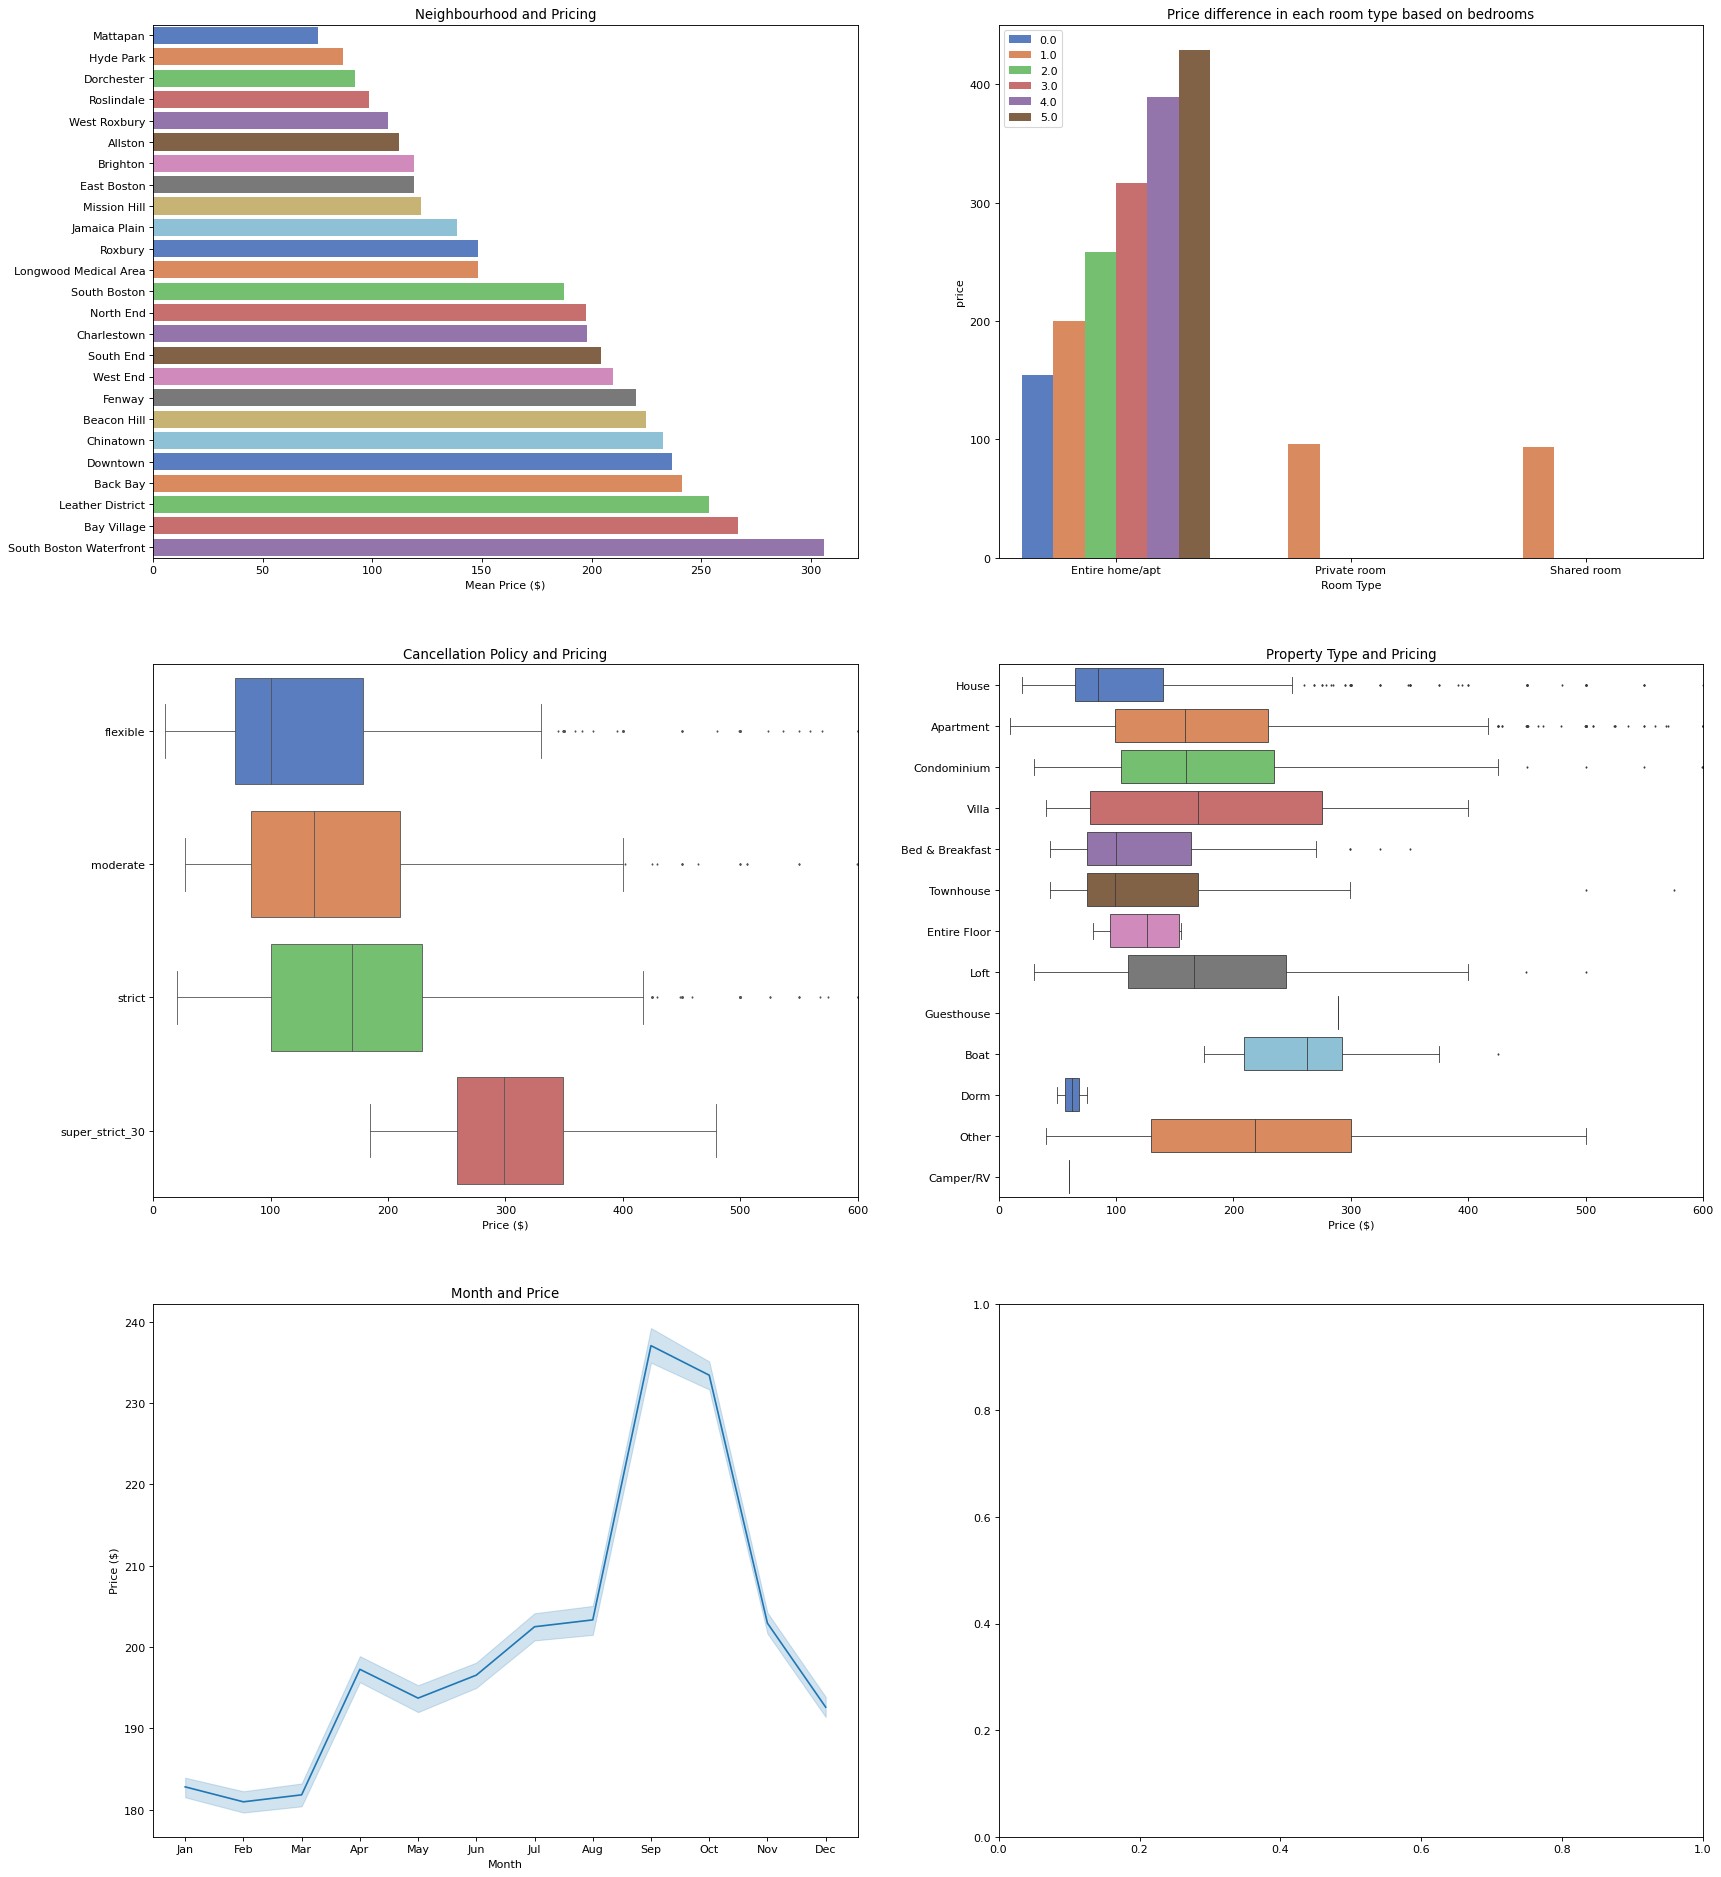

<Figure size 720x360 with 0 Axes>

In [21]:
#visualize the data btw selectd features and price column
fig, axs = plt.subplots(3, 2, figsize = (25, 30), dpi = 80)

df_roomtype = df_int.groupby(['room_type', 'bedrooms'], as_index = False).mean()

#neighbourhoods
neighbourhoods = df_int.groupby('neighbourhood_cleansed').agg(
    {
        'price': np.mean
    }
).reset_index()
sns.barplot(
    x='price', y='neighbourhood_cleansed',
    data=neighbourhoods.sort_values('price'),
    orient='h',
    palette='muted',
    ax=axs[0, 0]
)
axs[0, 0].set_title('Neighbourhood and Pricing')
axs[0, 0].set_xlabel('Mean Price ($)')
axs[0, 0].set_ylabel('')

#roomtype
sns.barplot(x = 'room_type', y = 'price', hue = 'bedrooms', data = df_roomtype, 
           palette = 'muted', ax = axs[0, 1])
axs[0, 1].set_title('Price difference in each room type based on bedrooms')
axs[0, 1].set_xlabel('Room Type')
axs[0, 1].legend()

#cancellation Policy
sns.boxplot(x='price', y='cancellation_policy', fliersize=1, linewidth=0.75,
            data=df_int, palette='muted', ax=axs[1, 0],
            order=['flexible', 'moderate', 'strict', 'super_strict_30'])
axs[1, 0].set_xlim(0, 600)
axs[1, 0].set_title('Cancellation Policy and Pricing')
axs[1, 0].set_xlabel('Price ($)')
axs[1, 0].set_ylabel('')

# Property type
sns.boxplot(x='price', y='property_type', fliersize=1, linewidth=0.75,
            data=df_int, palette='muted', ax=axs[1, 1])
axs[1, 1].set_xlim(0, 600)
axs[1, 1].set_title('Property Type and Pricing')
axs[1, 1].set_xlabel('Price ($)')
axs[1, 1].set_ylabel('')

#calendar
cats = ['Jan', 'Feb', 'Mar', 'Apr','May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
calendar_df['month'] = pd.Categorical(calendar_df['month'], ordered=True, categories=cats)

plt.figure(figsize=(10,5))

sns.lineplot(data = calendar_df, x = "month", y = "price", sort=True, ax = axs[2,0])

axs[2, 0].set_title("Month and Price")
axs[2, 0].set_xlabel('Month')
axs[2, 0].set_ylabel('Price ($)')


plt.tight_layout()
plt.show()

- Based on the visualization above, we can find that the entire home/apt is the maximum number of entries in Boston listing. And from the price distribution of entire home/apt, the maximum number of listings are btw $200-300 

- Based on the "Neighbourhood and pricing" bar chart, South Boston waterfront in the neighborhood is the most expensive listing 

- Based on the chart "Price difference in each room type based on bedrooms" the Entire home/apt is an expensive stay in the Boston data set, also, the price increases relatively with an increase in the number of bedrooms. 

- Based on the box plot "Property type and pricing" the other property type is in large numbers with high variance in price, apart from that, the insights are also says that large number of Villa type property available in the median price range. Further the analyses depict that the Condominium type properties are expensive than the Apartments and Villas.

- As per the cancellation policy data the super strict policy median value represents the high price(300). However, the outliers in other three policies distributed till the maximum price range. Most of the listing based on policies, considering 75th percentile in the box plot for Flexible is less than 200, for Moderate and strict policy is between 200 to 300.

- The line chart of "Price vs Months" depicts a seasonal trend in the change in monthly pricing. The pricing trend looks increasing throughout the months, starting from January, where the largest leap in pricing is identified in August and September months and drops between October and December. Also, the pricing during January to March is slightly flat and takes a small leap at March and April.